**LIVER DISEASE PREDICTION BY USING MACHINE LEARNING ALGORITHMS**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset= pd.read_csv("/content/liver_dataset.csv")


# **data cleaning and pre-prcessing**

In [ ]:
dataset.shape


(583, 11)

In [ ]:
dataset.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [ ]:
dataset.head(10)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
5,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,1
6,26,Female,0.9,0.2,154,16,12,7.0,3.5,1.00,1
7,29,Female,0.9,0.3,202,14,11,6.7,3.6,1.10,1
8,17,Male,0.9,0.3,202,22,19,7.4,4.1,1.20,2
9,55,Male,0.7,0.2,290,53,58,6.8,3.4,1.00,1


In [ ]:
dataset.dtypes[dataset.dtypes=='object']

Gender    object
dtype: object

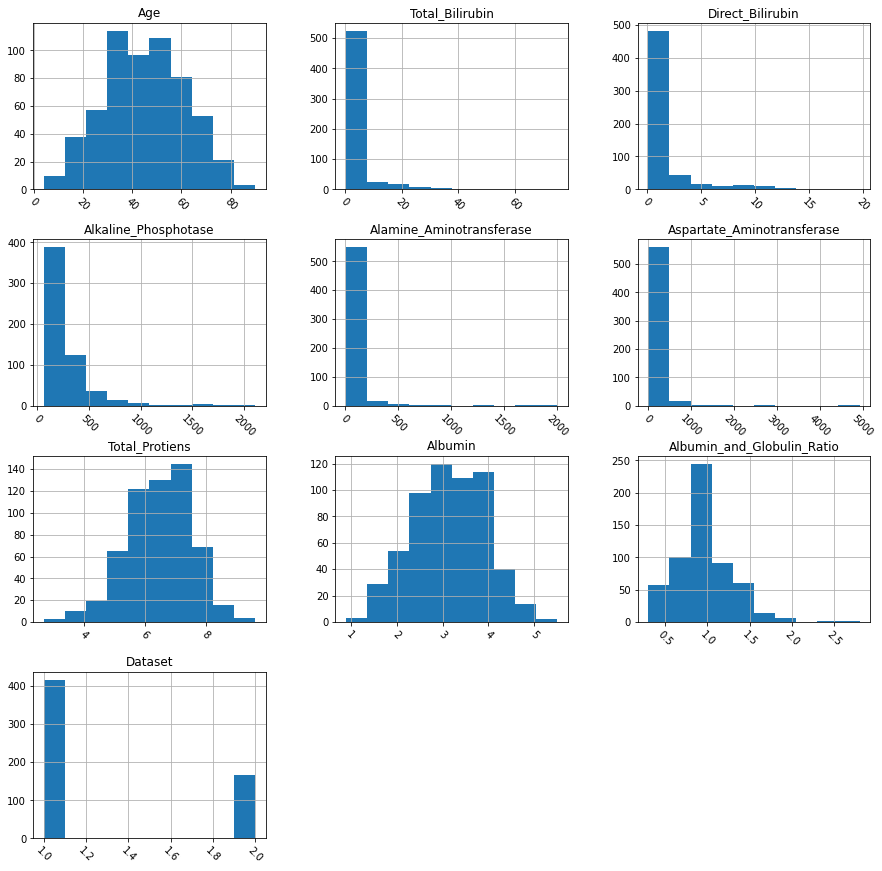

In [ ]:
dataset.hist(figsize=(15,15), xrot=-45, bins=10) 

plt.show()

In [ ]:
dataset.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [ ]:
dataset.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
578    False
579    False
580    False
581    False
582    False
Length: 583, dtype: bool

In [ ]:
dataset.duplicated().sum()

13

In [ ]:
dataset.isna().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [ ]:
dataset['Albumin_and_Globulin_Ratio'].mode()

0    1.0
dtype: float64

In [ ]:
dataset['Albumin_and_Globulin_Ratio'].median()

0.93

In [ ]:
dataset['Albumin_and_Globulin_Ratio'].mean()

0.9470639032815197

In [ ]:
dataset['Albumin_and_Globulin_Ratio'] = dataset['Albumin_and_Globulin_Ratio'].fillna(dataset['Albumin_and_Globulin_Ratio'].median())

In [ ]:
dataset.isna().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

# *Visualization of data * 

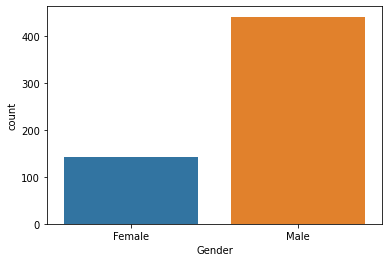

In [ ]:
import seaborn as sns
sns.countplot(data = dataset, x='Gender',label='count')

In [ ]:
Male,Female = dataset['Gender'].value_counts()
print('Number of patients that are male: ',Male)
print('Number of patients that are females: ',Female)

Number of patients that are male:  441
Number of patients that are females:  142


# **converting gender into binary values**

In [ ]:
#coverting the gender column into the binary for prediction. if the value is 1 then it is said to be male else value is 0 then it said to be female

In [ ]:
def partition(x):
    if x == 'Male':
        return 1
    return 0
dataset['Gender']= dataset['Gender'].map(partition)

In [ ]:
dataset

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,1,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,1,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,1,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,1,1.3,0.5,184,29,32,6.8,3.4,1.00,1


# **checking for a patient having liver disease or not**

In [ ]:
#checking the persons whether there having the liver disease or not if 0 means the person not having liver disease , if 1 then there is a liver disease for a person

In [ ]:
def partition(x):
    if x==2: 
        return 0 
    return 1
dataset['Dataset']= dataset['Dataset'].map(partition)

In [ ]:
dataset['Dataset']


0      1
1      1
2      1
3      1
4      1
      ..
578    0
579    1
580    1
581    1
582    0
Name: Dataset, Length: 583, dtype: int64

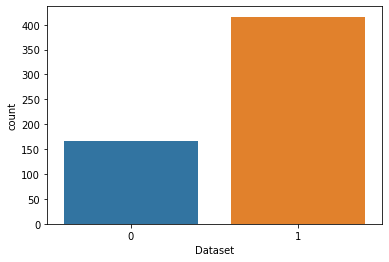

In [ ]:
sns.countplot(data = dataset, x='Dataset',label='count')

In [ ]:
PWLD,PWOLD = dataset['Dataset'].value_counts()
print('Number of patients with liver disease: ',PWLD)
print('Number of patients without liver disease: ',PWOLD)

Number of patients with liver disease:  416
Number of patients without liver disease:  167


# **Co-Relation Matrix**

In [ ]:
dataset.corr()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
Age,1.000000,0.056560,0.011763,0.007529,0.080425,-0.086883,-0.019910,-0.187461,-0.265924,-0.215968,0.137351
Gender,0.056560,1.000000,0.089291,0.100436,-0.027496,0.082332,0.080336,-0.089121,-0.093799,-0.003184,0.082416
Total_Bilirubin,0.011763,0.089291,1.000000,0.874618,0.206669,0.214065,0.237831,-0.008099,-0.222250,-0.206015,0.220208
Direct_Bilirubin,0.007529,0.100436,0.874618,1.000000,0.234939,0.233894,0.257544,-0.000139,-0.228531,-0.199850,0.246046
Alkaline_Phosphotase,0.080425,-0.027496,0.206669,0.234939,1.000000,0.125680,0.167196,-0.028514,-0.165453,-0.233784,0.184866
Alamine_Aminotransferase,-0.086883,0.082332,0.214065,0.233894,0.125680,1.000000,0.791966,-0.042518,-0.029742,-0.002254,0.163416
Aspartate_Aminotransferase,-0.019910,0.080336,0.237831,0.257544,0.167196,0.791966,1.000000,-0.025645,-0.085290,-0.069930,0.151934
Total_Protiens,-0.187461,-0.089121,-0.008099,-0.000139,-0.028514,-0.042518,-0.025645,1.000000,0.784053,0.233828,-0.035008
Albumin,-0.265924,-0.093799,-0.222250,-0.228531,-0.165453,-0.029742,-0.085290,0.784053,1.000000,0.686091,-0.161388
Albumin_and_Globulin_Ratio,-0.215968,-0.003184,-0.206015,-0.199850,-0.233784,-0.002254,-0.069930,0.233828,0.686091,1.000000,-0.162144


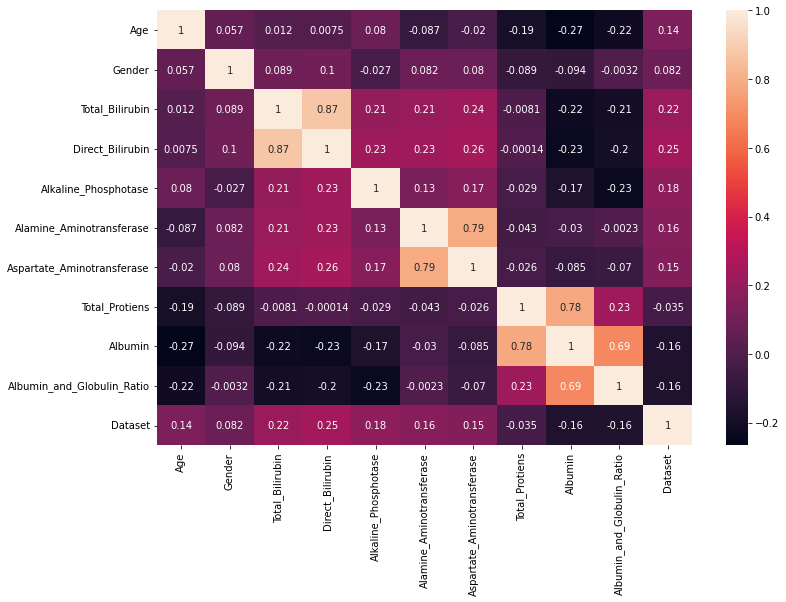

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(dataset.corr(), annot=True)
plt.show()

In [ ]:
dataset = dataset.drop_duplicates()

In [ ]:
print(dataset.shape)

(570, 11)




---


 **Outlier detection**

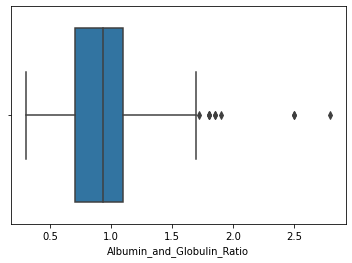

In [ ]:
sns.boxplot(data= dataset, x='Albumin_and_Globulin_Ratio')

In [ ]:
dataset.Albumin_and_Globulin_Ratio.sort_values(ascending=False).head()

548    2.80
572    2.50
575    2.50
215    1.90
24     1.85
Name: Albumin_and_Globulin_Ratio, dtype: float64

In [ ]:
dataset= dataset[dataset.Albumin_and_Globulin_Ratio <=2.70]
dataset.shape

(569, 11)

In [ ]:
dataset.isnull().values.any()

False

In [ ]:
dataset.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [ ]:
X = dataset.iloc[:,:-1]
y= dataset.iloc[:,-1]

In [ ]:
X.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40


In [ ]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Dataset, dtype: int64

**spliting of data into training and testing**

In [ ]:
from sklearn.datasets import load_digits
digits=load_digits()
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42 )


In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(455, 10)
(455,)
(114, 10)
(114,)


**1. Support Vector Machine (SVM)**

In [ ]:

from sklearn.svm import SVC
svm = SVC(kernel ='rbf', random_state = 42)
svm.fit(X_train, y_train)

SVC(random_state=42)

In [ ]:
 np.unique(y)

array([0, 1])

In [ ]:
svm_y_pred = svm.predict(X_test)

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay
from tabulate import tabulate
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import plot_confusion_matrix
svm.score(X_test,y_test)

0.7017543859649122

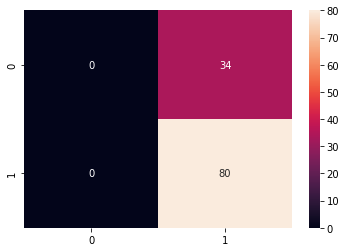

In [ ]:
svm_cm = confusion_matrix(y_test,svm_y_pred,labels=[0,1])
sns.heatmap(svm_cm, annot=True)

In [ ]:
print(svm_cm)

[[ 0 34]
 [ 0 80]]


In [ ]:
svm_MAE = mean_absolute_error(y_test, svm_y_pred)
svm_MAE

0.2982456140350877

Threshold : [2 1]
 ROC score is 0.500000


Text(0.5, 0, 'False Positive Rate')

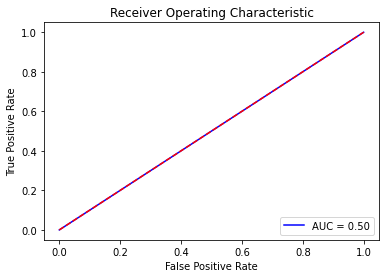

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score, accuracy_score,precision_score,auc,roc_auc_score,roc_curve,recall_score,mean_absolute_error
fpr, tpr, thresholds = roc_curve(y_test, svm_y_pred)
print('Threshold : ' + str(thresholds))
roc_auc = auc(fpr, tpr)
print (' ROC score is %f'% (roc_auc))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [ ]:
svm_score = svm.score(X_train, y_train)
svm_score_test = svm.score(X_test, y_test)
svm_accuracy = accuracy_score(y_test, svm_y_pred)
svm_precision= precision_score(y_test, svm_y_pred)
svm_recall=recall_score(y_test,svm_y_pred)
svm_f1=f1_score(y_test,svm_y_pred)
svm_MAE = mean_absolute_error(y_test, svm_y_pred)

print('SVM Train Score: ', svm_score)
print('SVM Test Score: ', svm_score_test)
print('Accuracy: ', svm_accuracy)
print('precision',svm_precision)
print('mean absolute error',svm_MAE)
print('recall',svm_recall)
print('f1',svm_f1)
print('confusion matrix',svm_cm)



SVM Train Score:  0.7142857142857143
SVM Test Score:  0.7017543859649122
Accuracy:  0.7017543859649122
precision 0.7017543859649122
mean absolute error 0.2982456140350877
recall 1.0
f1 0.8247422680412371
confusion matrix [[ 0 34]
 [ 0 80]]


In [ ]:
#cross_validation of k=5,10
from sklearn.model_selection import cross_val_score

In [ ]:
k_fold = KFold(n_splits=5)
svm_k_1 = cross_val_score(svm,X,y,cv=k_fold, scoring='accuracy').mean()
svm_k_1

0.7118304611085235

In [ ]:
k_fold = KFold(n_splits=7)
svm_k_2 = cross_val_score(svm,X,y,cv=k_fold, scoring='accuracy').mean()
svm_k_2

0.7116402116402115

In [ ]:
k_fold = KFold(n_splits=10)
svm_k_3 = cross_val_score(svm,X,y,cv=k_fold, scoring='accuracy').mean()
svm_k_3

0.7118734335839599

**2. Naive Bayes**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnb.score(X_test, y_test)

0.543859649122807

In [ ]:
y_pred = gnb.predict(X_test)
y_pred_prob = gnb.predict_proba(X_test)[:1]

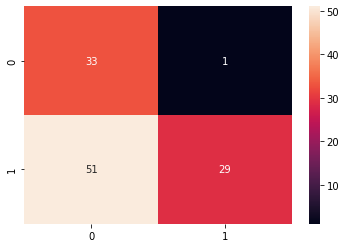

In [ ]:
# calculating confusion matrix
from sklearn.metrics import confusion_matrix
gnb_cm = confusion_matrix(y_test,y_pred)
sns.heatmap(gnb_cm, annot=True)

In [ ]:
gnb_MAE = mean_absolute_error(y_test, y_pred)
gnb_MAE

0.45614035087719296

Threshold : [2 1 0]
 ROC score is 0.666544


Text(0.5, 0, 'False Positive Rate')

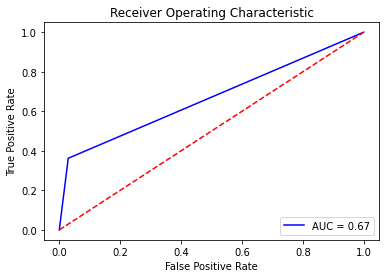

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score, accuracy_score,auc,roc_auc_score,roc_curve,recall_score
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
print('Threshold : ' + str(thresholds))
roc_auc = auc(false_positive_rate, true_positive_rate)
print (' ROC score is %f'% (roc_auc))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b', label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [ ]:
gnb_score = gnb.score(X_train, y_train)
gnb_score_test = gnb.score(X_test, y_test)
gnb_accuracy = accuracy_score(y_test, y_pred)
gnb_precision= precision_score(y_test, y_pred)
gnb_recall=recall_score(y_test,y_pred)
gnb_f1=f1_score(y_test,y_pred)
gnb_MAE = mean_absolute_error(y_test,y_pred)

print('gnb Train Score: ', gnb_score)
print('gnb Test Score: ', gnb_score_test)
print('Accuracy: ', gnb_accuracy)
print('precision',gnb_precision)
print('mean absolute error',gnb_MAE)
print('recall',gnb_recall)
print('f1',gnb_f1)
print('confusion matrix',gnb_cm)

gnb Train Score:  0.5626373626373626
gnb Test Score:  0.543859649122807
Accuracy:  0.543859649122807
precision 0.9666666666666667
mean absolute error 0.45614035087719296
recall 0.3625
f1 0.5272727272727272
confusion matrix [[33  1]
 [51 29]]


In [ ]:
k_fold = KFold(n_splits=5)
gnb_k_1 = cross_val_score(gnb,X,y,cv=k_fold, scoring='accuracy').mean()
gnb_k_1

0.5678466076696166

In [ ]:
k_fold = KFold(n_splits=7)
gnb_k_2 = cross_val_score(gnb,X,y,cv=k_fold, scoring='accuracy').mean()
gnb_k_2

0.5710414246999612

In [ ]:
k_fold = KFold(n_splits=10)
gnb_k_3 = cross_val_score(gnb,X,y,cv=k_fold, scoring='accuracy').mean()
gnb_k_3

0.5609335839598997

**3.Artifical Neural Network**

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score

In [ ]:

    # Initialising the ANN
    classifier = Sequential()
    # Adding the input layer and the first hidden layer
    classifier.add(Dense(units = 400, kernel_initializer = 'uniform', activation = 'relu', input_dim = 10))
    classifier.add(Dense(units = 400, kernel_initializer = 'uniform', activation = 'relu'))

    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


In [ ]:
ann = classifier.fit(X_train,y_train,batch_size=32,epochs=100)

Epoch 1/100
15/15 [==============================] - 1s 5ms/step - loss: 0.9892 - accuracy: 0.6835
Epoch 2/100
15/15 [==============================] - 0s 4ms/step - loss: 0.6188 - accuracy: 0.6659
Epoch 3/100
15/15 [==============================] - 0s 5ms/step - loss: 0.5768 - accuracy: 0.6923
Epoch 4/100
15/15 [==============================] - 0s 4ms/step - loss: 0.5711 - accuracy: 0.7055
Epoch 5/100
15/15 [==============================] - 0s 4ms/step - loss: 0.5572 - accuracy: 0.6967
Epoch 6/100
15/15 [==============================] - 0s 4ms/step - loss: 0.5528 - accuracy: 0.6945
Epoch 7/100
15/15 [==============================] - 0s 5ms/step - loss: 0.5622 - accuracy: 0.6747
Epoch 8/100
15/15 [==============================] - 0s 5ms/step - loss: 0.5607 - accuracy: 0.6813
Epoch 9/100
15/15 [==============================] - 0s 5ms/step - loss: 0.5756 - accuracy: 0.6725
Epoch 10/100
15/15 [==============================] - 0s 5ms/step - loss: 0.5262 - accuracy: 0.7143
Epoch 11/

In [ ]:
ann_y_pred = classifier.predict(X_test)

In [ ]:
ann_y_pred =[1 if y>=0.5 else 0 for y in ann_y_pred]

In [ ]:
classifier = KerasClassifier(build_fn=build_classifier, 
                                 nb_epoch=10, 
                                 batch_size=100, 
                                 )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
ann_k_1 =cross_val_score(classifier, X=X_train, y= y_train, cv=5,scoring='accuracy').mean()

4/4 [==============================] - 1s 8ms/step - loss: 2.0523 - accuracy: 0.5412


4/4 [==============================] - 1s 7ms/step - loss: 1.5896 - accuracy: 0.6099


In [ ]:
ann_k_1.mean()

0.6065934065934065

In [ ]:
ann_k_2 =cross_val_score(classifier, X=X_train, y= y_train, cv=7,scoring='accuracy').mean()

4/4 [==============================] - 0s 7ms/step - loss: 1.8423 - accuracy: 0.6154


In [ ]:
ann_k_2.mean()

0.665934065934066

In [ ]:
ann_k_3 =cross_val_score(classifier, X=X_train, y= y_train, cv=10,scoring='accuracy').mean()

5/5 [==============================] - 1s 6ms/step - loss: 1.6310 - accuracy: 0.6707


In [ ]:
ann_k_3.mean()

0.6920289855072463

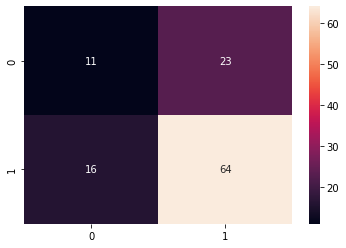

In [ ]:
from sklearn.metrics import confusion_matrix
ann_cm = confusion_matrix(y_test , ann_y_pred)
sns.heatmap(ann_cm , annot=True)

In [ ]:
ann_MAE = mean_absolute_error(y_test, ann_y_pred)
ann_MAE

0.34210526315789475

Threshold : [2 1 0]


Text(0.5, 0, 'False Positive Rate')

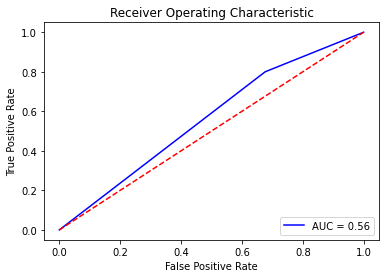

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score, accuracy_score,auc,roc_auc_score,roc_curve,recall_score
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, ann_y_pred)
print('Threshold : ' + str(thresholds))
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b', label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [ ]:

ann_accuracy = accuracy_score(y_test, ann_y_pred)
ann_precision= precision_score(y_test, ann_y_pred)
ann_recall=recall_score(y_test,ann_y_pred)
ann_f1=f1_score(y_test,ann_y_pred)
ann_MAE = mean_absolute_error(y_test,ann_y_pred)

print('Accuracy: ', ann_accuracy)
print('precision',ann_precision)
print('mean absolute error',ann_MAE)
print('recall',ann_recall)
print('f1',ann_f1)
print('confusion matrix',ann_cm)

Accuracy:  0.6578947368421053
precision 0.735632183908046
mean absolute error 0.34210526315789475
recall 0.8
f1 0.7664670658682634
confusion matrix [[11 23]
 [16 64]]


Tabulated form of  Precision, Recall, F1_score, Mean Absolute Error, Accuracy for machine learning models

In [ ]:
##Tabular Representaion of Data
d = [["artificial neural network",ann,ann_cm,ann_precision,ann_recall,ann_f1,ann_MAE,ann_accuracy],["Support Vector Machine",svm,svm_cm,svm_precision,svm_recall,svm_f1,svm_MAE,svm_accuracy],["Gaussian Naive Bayes",gnb,gnb_cm,gnb_precision,gnb_recall,gnb_f1,gnb_MAE,gnb_accuracy]]
print(tabulate(d, headers = ["Name","Accuracy","Confusion Matrix","Precision","Recall","F1 Score","Mean Absolute Error","Accuracy"]))

Name                       Accuracy                                            Confusion Matrix      Precision    Recall    F1 Score    Mean Absolute Error    Accuracy
-------------------------  --------------------------------------------------  ------------------  -----------  --------  ----------  ---------------------  ----------
artificial neural network  <keras.callbacks.History object at 0x7fd5f0022f10>  [[11 23]               0.735632    0.8       0.766467               0.342105    0.657895
                                                                                [16 64]]
Support Vector Machine     SVC(random_state=42)                                [[ 0 34]               0.701754    1         0.824742               0.298246    0.701754
                                                                                [ 0 80]]
Gaussian Naive Bayes       GaussianNB()                                        [[33  1]               0.966667    0.3625    0.527273               0.4

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  if __name__ == '__main__':


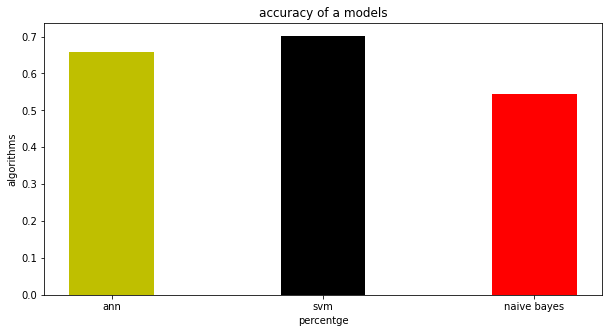

In [ ]:
data = {'ann':ann_accuracy, 'svm':svm_accuracy, 'naive bayes':gnb_accuracy,
        }
courses = list(data.keys())
values = list(data.values())
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(courses, values, color ='ykr',
        width = 0.4)
 
plt.xlabel("percentge")
plt.ylabel("algorithms")
plt.title("accuracy of a models")
plt.show()

Tabulated form of k cross validation for SVM,ANN and Naive Bayes

In [ ]:
print("Number of Folds : 5")
d = [["Artificial neural network",ann_k_1],
     ["Support Vector Machine",svm_k_1],
     ["Naive Bayes",gnb_k_1]]
print(tabulate(d, headers = ["Name","Scores"]))

Number of Folds : 5
Name                         Scores
-------------------------  --------
Artificial neural network  0.606593
Support Vector Machine     0.71183
Naive Bayes                0.567847


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  if __name__ == '__main__':


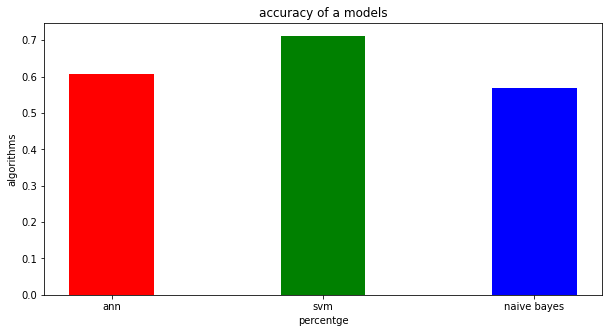

In [ ]:
data = {'ann':ann_k_1, 'svm':svm_k_1, 'naive bayes':gnb_k_1,
        }
courses = list(data.keys())
values = list(data.values())
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(courses, values, color ='rgb',
        width = 0.4)
 
plt.xlabel("percentge")
plt.ylabel("algorithms")
plt.title("accuracy of a models")
plt.show()

In [ ]:
print("Number of Folds : 7")
d = [["Artificial neural network",ann_k_2],
     ["Support Vector Machine",svm_k_2],
     ["Naive Bayes",gnb_k_2]]
print(tabulate(d, headers = ["Name","Scores"]))

Number of Folds : 7
Name                         Scores
-------------------------  --------
Artificial neural network  0.665934
Support Vector Machine     0.71164
Naive Bayes                0.571041


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  if __name__ == '__main__':


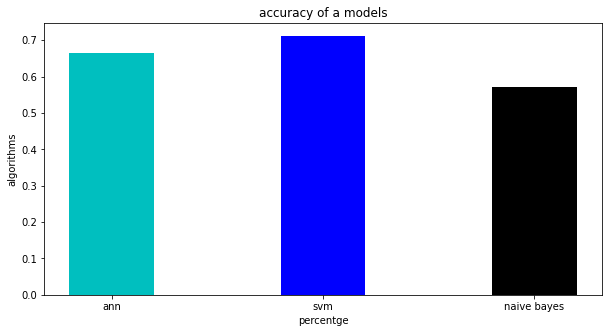

In [ ]:
data = {'ann':ann_k_2, 'svm':svm_k_2, 'naive bayes':gnb_k_2,
        }
courses = list(data.keys())
values = list(data.values())
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(courses, values, color ='cbk',
        width = 0.4)
 
plt.xlabel("percentge")
plt.ylabel("algorithms")
plt.title("accuracy of a models")
plt.show()

In [ ]:
print("Number of Folds : 10")
d = [["Artificial neural network",ann_k_3],
     ["Support Vector Machine",svm_k_3],
     ["Naive Bayes",gnb_k_3]]
print(tabulate(d, headers = ["Name","Scores"]))

Number of Folds : 10
Name                         Scores
-------------------------  --------
Artificial neural network  0.692029
Support Vector Machine     0.711873
Naive Bayes                0.560934


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  if __name__ == '__main__':


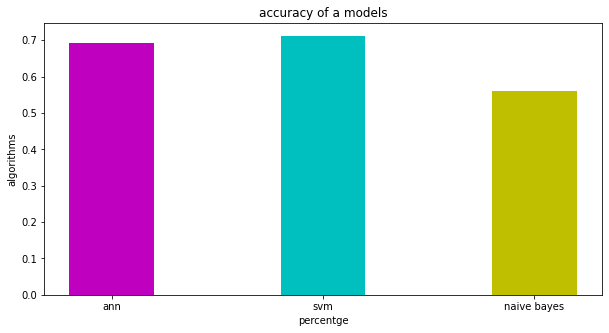

In [ ]:
data = {'ann':ann_k_3, 'svm':svm_k_3, 'naive bayes':gnb_k_3,
        }
courses = list(data.keys())
values = list(data.values())
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(courses, values, color ='mcy',
        width = 0.4)
 
plt.xlabel("percentge")
plt.ylabel("algorithms")
plt.title("accuracy of a models")
plt.show()

# **comparision of evalution of matrics**

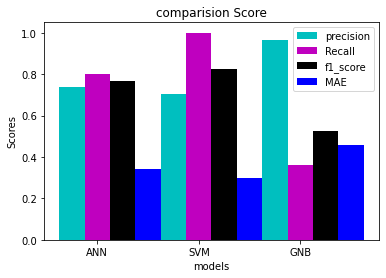

<Figure size 1080x792 with 0 Axes>

In [ ]:
N = 3
ind = np.arange(N) 
width = 0.25
  
xvals = [ann_precision, svm_precision, gnb_precision]
bar1 = plt.bar(ind, xvals, width, color = 'c')
  
yvals = [ann_recall, svm_recall,  gnb_recall]
bar2 = plt.bar(ind+width, yvals, width, color='m')
  
zvals = [ann_f1, svm_f1, gnb_f1]
bar3 = plt.bar(ind+width*2, zvals, width, color = 'k')

kvals = [ann_MAE, svm_MAE, gnb_MAE]
bar4 = plt.bar(ind+width*3, kvals, width, color = 'b')
  
plt.xlabel("models")
plt.ylabel('Scores')
plt.title("comparision Score")
  
plt.xticks(ind+width,['ANN', 'SVM', 'GNB'])
plt.legend( (bar1, bar2, bar3, bar4), ('precision', 'Recall', 'f1_score', 'MAE') )
plt.figure(figsize=(15,11))
plt.show()